# Used Car Price Prediction

The market for so-called second-hand cars is enormous.
Many people think about buying a used car instead of a new one since it is more practical and a better investment.

The primary factor driving this enormous market is the 30% price reduction that occurs when a brand-new car is purchased and sold the following day without any sort of default.

There are a lot of scammers out there who not only sell things incorrectly but also could induce people to pay the incorrect price.

In [78]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [79]:
test_data = pd.read_csv('usedcartest.csv')
train_data = pd.read_csv('usedcartrain.csv')


In [80]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [81]:
train_data.head(10)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74
5,5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35
6,6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50
7,7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50
8,8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20
9,9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95


In [82]:
train_data = train_data.iloc[:,1:]

train_data.head(3)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50


In [83]:
train_data.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [84]:
#printing out unique features in the categorical values to figure out how to best handle them
print(train_data['Owner_Type'].unique())
print(train_data['Location'].unique())                       
print(train_data['Transmission'].unique())
print(train_data['Fuel_Type'].unique())


['First' 'Second' 'Fourth & Above' 'Third']
['Mumbai' 'Pune' 'Chennai' 'Coimbatore' 'Hyderabad' 'Jaipur' 'Kochi'
 'Kolkata' 'Delhi' 'Bangalore' 'Ahmedabad']
['Manual' 'Automatic']
['CNG' 'Diesel' 'Petrol' 'LPG' 'Electric']


In [85]:
train_data.shape

(6019, 13)

In [86]:
#finding out the numer of NULL values in all the features
train_data.isnull().sum()      

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

We deleted the rows which contained null values with the exception of New Price column

In [87]:
print("Original shape of train data : ",train_data.shape)
train_data = train_data[train_data['Mileage'].notna()]
train_data = train_data[train_data['Power'].notna()]
train_data = train_data[train_data['Engine'].notna()]
train_data = train_data[train_data['Seats'].notna()]
print("Shape of train data after dropping rows wwith NULL values: ",train_data.shape)

Original shape of train data :  (6019, 13)
Shape of train data after dropping rows wwith NULL values:  (5975, 13)


Until now we have deleted 44 rows

In [88]:
train_data = train_data.reset_index(drop=True)        

After using notna() there were many absent indexes ,so to handle that we reset the index and droping the present index

# Feature Engineering 🛠
From the present situation, different kinds of data can be extrapolated. The usage of feature engineering is then performed.

In [89]:
for i in range(train_data.shape[0]):
    train_data.at[i, 'Company'] = train_data['Name'][i].split()[0]
    train_data.at[i, 'Mileage(km/kg)'] = train_data['Mileage'][i].split()[0]
    train_data.at[i, 'Engine(CC)'] = train_data['Engine'][i].split()[0]
    train_data.at[i, 'Power(bhp)'] = train_data['Power'][i].split()[0]

In [90]:
train_data['Engine(CC)'] = train_data['Engine(CC)'].astype(float)
train_data['Mileage(km/kg)'] = train_data['Mileage(km/kg)'].astype(float)


We encountered a few rows with 'NULL' values in the 'Power(bhp)' feature column which was stopping us from converting the values to float, so we had to drop all such rows.

In [91]:
#pushing indexes of rows with NULL in Power(bhp) column into a list 
x = 'Not null'     
total_null_values = 0
index_list = []
for i in range(train_data.shape[0]):
    if train_data['Power(bhp)'][i]=='null':
        x = 'Null'
        total_null_values = total_null_values + 1                
        index_list.append(i)                              

print("Total number of null values are :",total_null_values)
print(index_list)

Total number of null values are : 103
[76, 79, 89, 120, 143, 225, 242, 259, 304, 305, 383, 421, 425, 440, 469, 572, 628, 644, 645, 735, 744, 824, 910, 921, 929, 1063, 1138, 1148, 1266, 1313, 1338, 1380, 1411, 1546, 1569, 1640, 1663, 1848, 1989, 2043, 2118, 2152, 2250, 2254, 2292, 2328, 2377, 2425, 2434, 2481, 2485, 2511, 2561, 2579, 2616, 2621, 2868, 3010, 3038, 3081, 3166, 3224, 3266, 3414, 3491, 3506, 3562, 3601, 3611, 3618, 3642, 3706, 3868, 3900, 3969, 4046, 4049, 4318, 4321, 4593, 4672, 4676, 4706, 4792, 4848, 4862, 4914, 5024, 5078, 5186, 5383, 5395, 5415, 5486, 5490, 5604, 5712, 5716, 5818, 5830, 5881, 5899, 5941]


In [92]:
train_data = train_data.drop(train_data.index[index_list])
#resetting the index values after dropping the rows with NULL values in Power(bhp) column 
train_data = train_data.reset_index(drop=True)

In [93]:
#conerting Power(bhp) into float type
train_data['Power(bhp)'] = train_data['Power(bhp)'].astype(float)               

In [94]:
train_data.head(10)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti,26.60,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai,19.67,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50,Honda,18.20,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00,Maruti,20.77,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74,Audi,15.20,1968.0,140.80
5,Hyundai EON LPG Era Plus Option,Hyderabad,2012,75000,LPG,Manual,First,21.1 km/kg,814 CC,55.2 bhp,5.0,NaN,2.35,Hyundai,21.10,814.0,55.20
6,Nissan Micra Diesel XV,Jaipur,2013,86999,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,NaN,3.50,Nissan,23.08,1461.0,63.10
7,Toyota Innova Crysta 2.8 GX AT 8S,Mumbai,2016,36000,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,8.0,21 Lakh,17.50,Toyota,11.36,2755.0,171.50
8,Volkswagen Vento Diesel Comfortline,Pune,2013,64430,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,NaN,5.20,Volkswagen,20.54,1598.0,103.60
9,Tata Indica Vista Quadrajet LS,Chennai,2012,65932,Diesel,Manual,Second,22.3 kmpl,1248 CC,74 bhp,5.0,NaN,1.95,Tata,22.30,1248.0,74.00


In [95]:
for val in range(train_data.shape[0]):
    if pd.isnull(train_data.loc[val,'New_Price']) == False:
        train_data.at[val,'New_car_Price'] = train_data['New_Price'][val].split()[0]
#converting New_car_Price to float
train_data['New_car_Price'] = train_data['New_car_Price'].astype(float)   

getting rid of the features that are least useful

In [96]:
#dropping features which least affect the price
train_data.drop(["Engine"],axis=1,inplace=True)
train_data.drop(["Name"],axis=1,inplace=True)
train_data.drop(["New_Price"],axis=1,inplace=True)      
train_data.drop(["Mileage"],axis=1,inplace=True)
train_data.drop(["Power"],axis=1,inplace=True)


# Data Visualization
Data visualization is the most effective method for determining how a data set looks.

In [97]:
#train data description after changes
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5872 entries, 0 to 5871
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           5872 non-null   object 
 1   Year               5872 non-null   int64  
 2   Kilometers_Driven  5872 non-null   int64  
 3   Fuel_Type          5872 non-null   object 
 4   Transmission       5872 non-null   object 
 5   Owner_Type         5872 non-null   object 
 6   Seats              5872 non-null   float64
 7   Price              5872 non-null   float64
 8   Company            5872 non-null   object 
 9   Mileage(km/kg)     5872 non-null   float64
 10  Engine(CC)         5872 non-null   float64
 11  Power(bhp)         5872 non-null   float64
 12  New_car_Price      823 non-null    float64
dtypes: float64(6), int64(2), object(5)
memory usage: 596.5+ KB


In [98]:
train_data['Price'].describe()

count    5872.000000
mean        9.603919
std        11.249453
min         0.440000
25%         3.517500
50%         5.750000
75%        10.000000
max       160.000000
Name: Price, dtype: float64

### Price

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(0.0, 100.0)

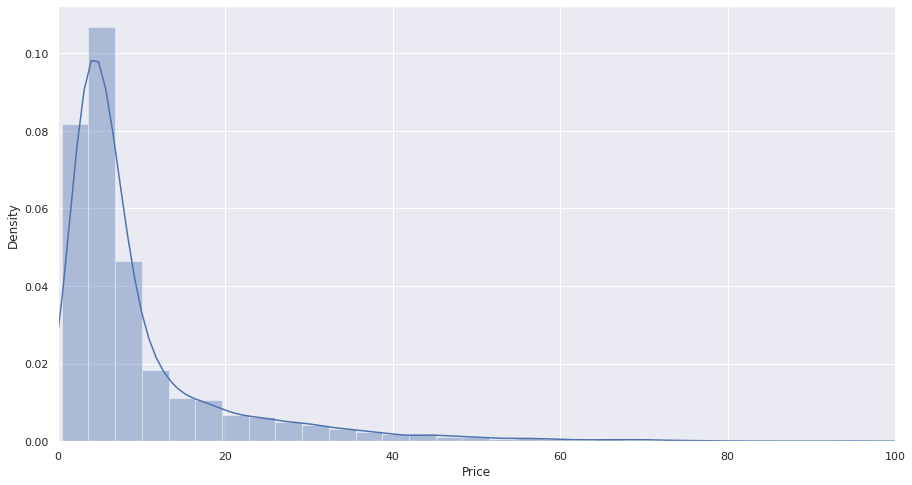

In [99]:
f, ax = plt.subplots(figsize=(15,8))
sns.distplot(train_data['Price'])
plt.xlim([0,100])

### Fuel Type

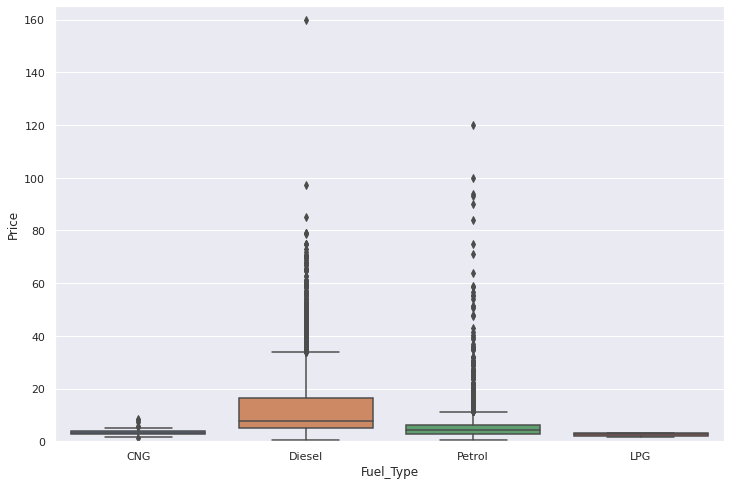

In [100]:
feature_value = 'Fuel_Type'
f, ax = plt.subplots(figsize=(12, 8)) 
fig = sns.boxplot(x=feature_value, y="Price", data=pd.concat([train_data['Price'], train_data[feature_value]], axis=1))
fig.axis(ymin=0, ymax=165);

As we can see there are cars with 4 fuel types

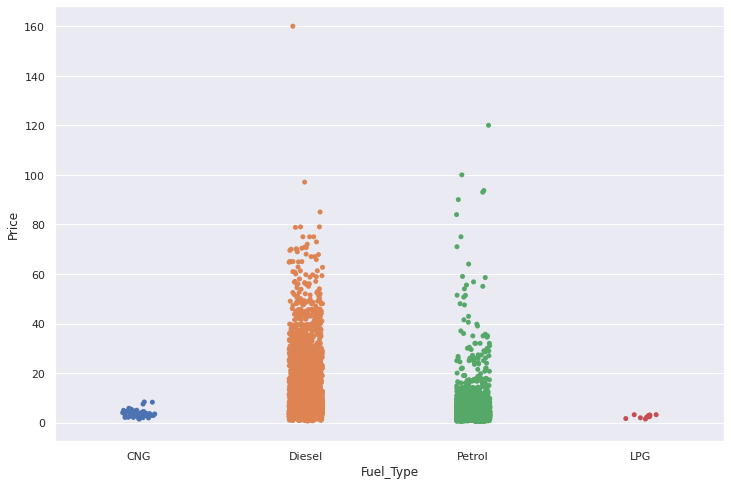

In [101]:
feature_value = 'Fuel_Type'
fig, ax = plt.subplots()
fig.set_size_inches(12, 8)
sns.stripplot(x = feature_value, y ='Price', data = train_data)

### Year

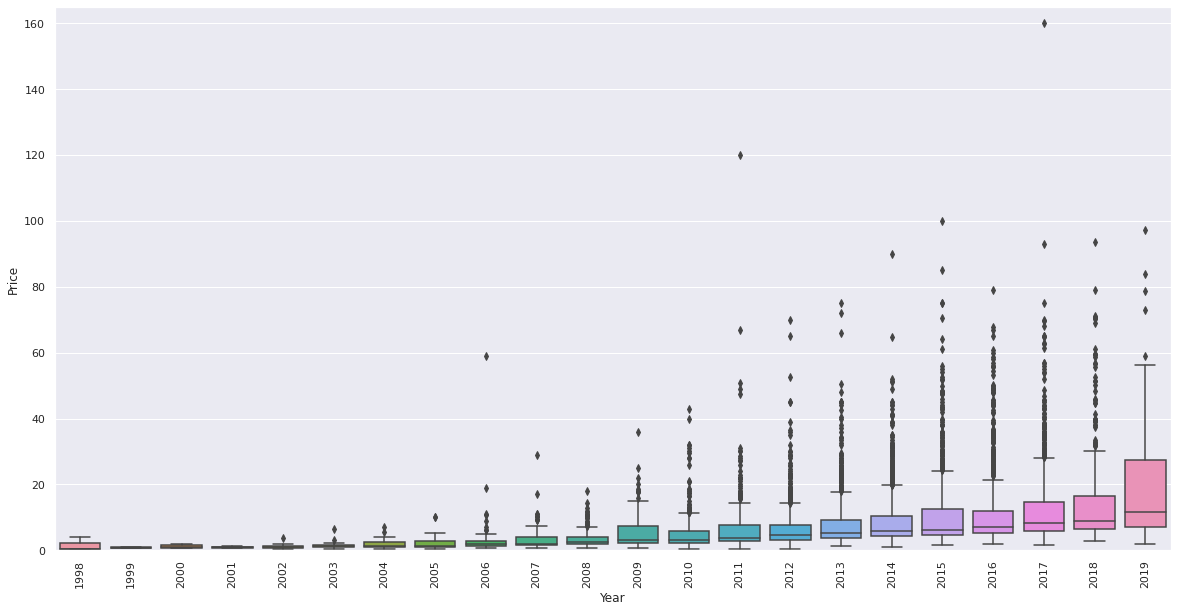

In [102]:
feature_value = 'Year'
f, ax = plt.subplots(figsize=(20, 10))
fig = sns.boxplot(x=feature_value, y="Price", data=pd.concat([train_data['Price'], train_data[feature_value]], axis=1))
fig.axis(ymin=0, ymax=165);
plt.xticks(rotation=90);

### Owner Type

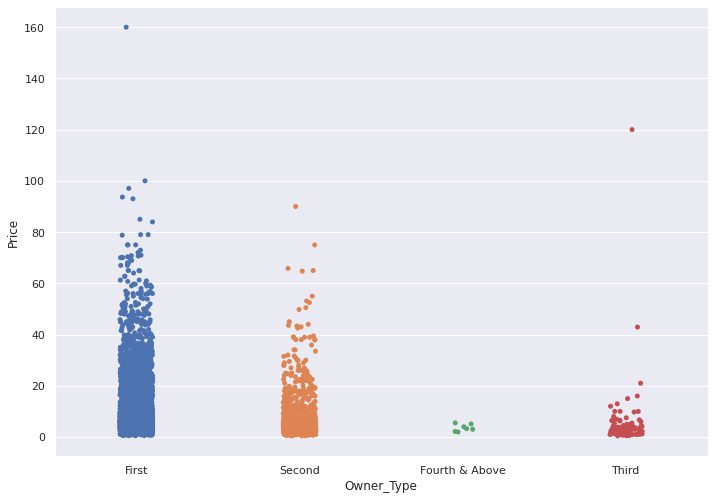

In [103]:
feature_value = 'Owner_Type'
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.stripplot(x = feature_value, y ='Price', data = train_data) 

### Company

<Figure size 1440x720 with 0 Axes>

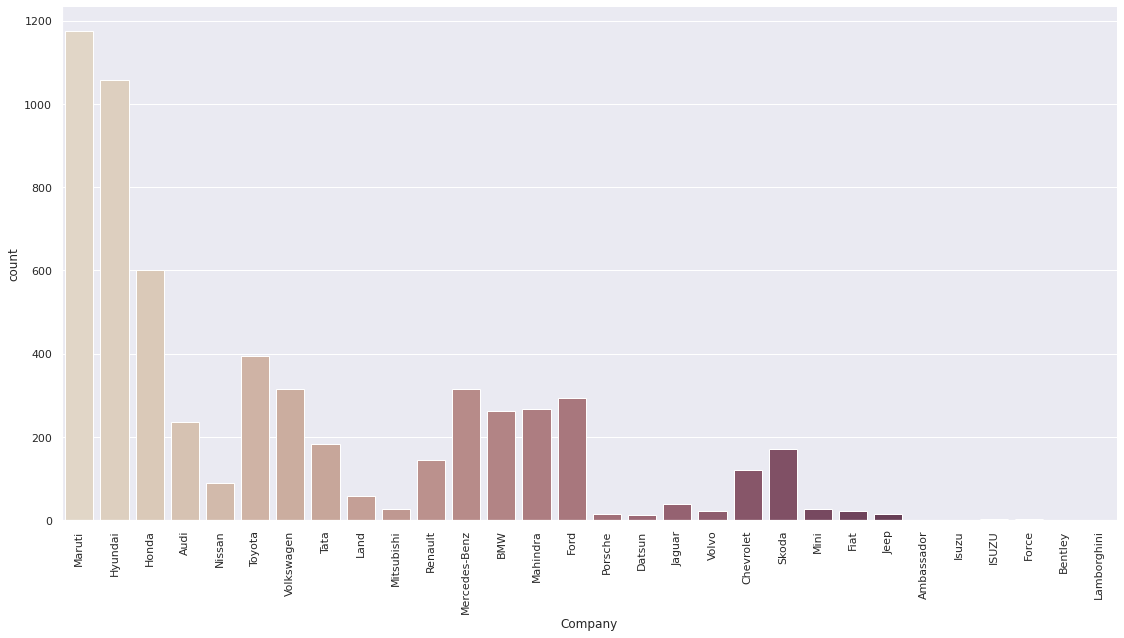

In [104]:
feature_value = "Company"
plt.figure(figsize=(20, 10))
sns.catplot(x=feature_value, kind="count", palette="ch:.25", height=8, aspect=2, data=train_data);
plt.xticks(rotation=90);

# Working with Categorical Data

There are 5 categorical values:
1. Owner_Type
2. Company
3. Transmission
4. Location
5. Fuel_Type

We used OneHotEncoder and LabelEncoder to convert categorical data to numerical data.
OneHotEncoder is used when the data are not in any particular order, and LabelEncoder is used for ordered data.

<function matplotlib.pyplot.show(*args, **kw)>

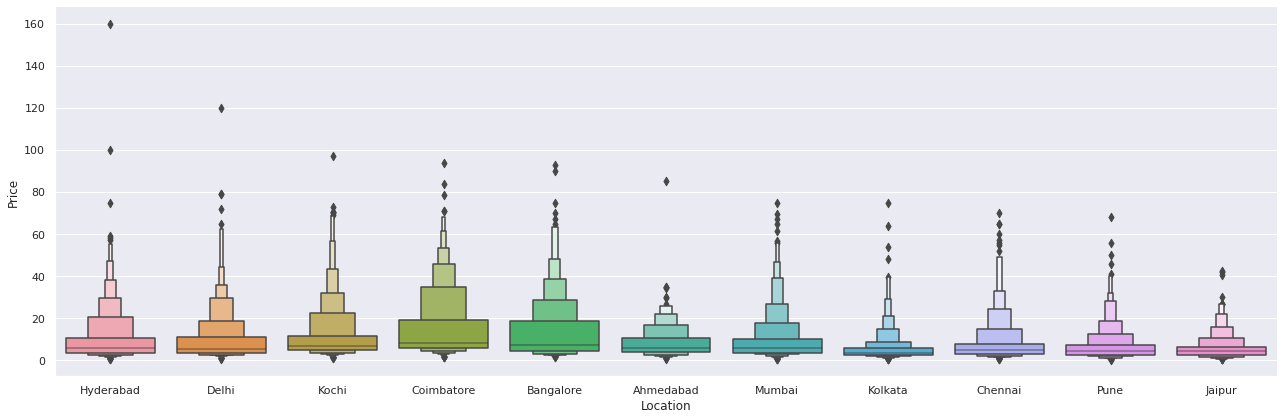

In [105]:
# Plotting Location vs Price
sns.catplot(y='Price',x='Location',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Here we use OneHotEncoding as the data is not ordered.

In [106]:
Location = train_data[['Location']]
Location = pd.get_dummies(Location,drop_first=True)
Location.head()

,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune
0,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


<function matplotlib.pyplot.show(*args, **kw)>

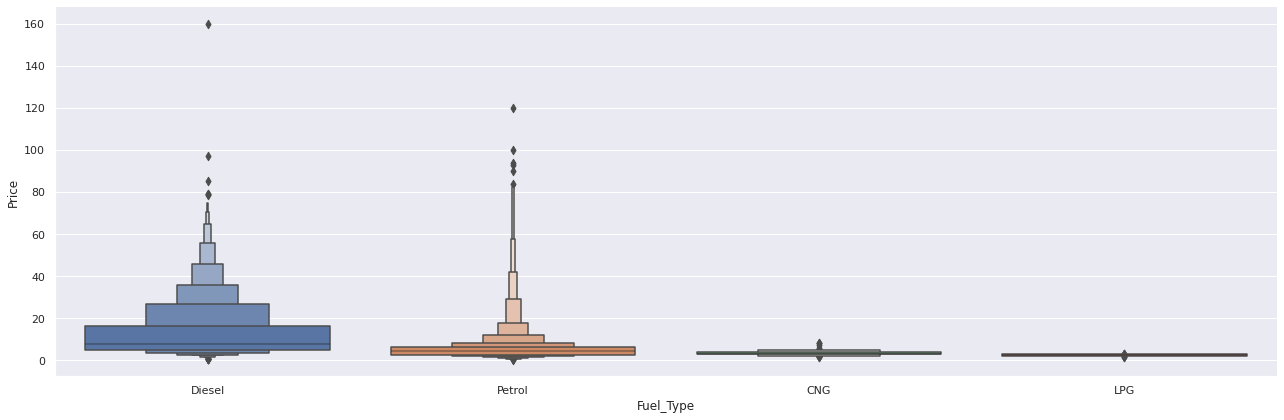

In [107]:
#catplot of fuel_typr vs price
sns.catplot(y='Price',x='Fuel_Type',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [108]:
Fuel_t = train_data[['Fuel_Type']]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)
Fuel_t.head()

,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol
0,0,0,0
1,1,0,0
2,0,0,1
3,1,0,0
4,1,0,0


<function matplotlib.pyplot.show(*args, **kw)>

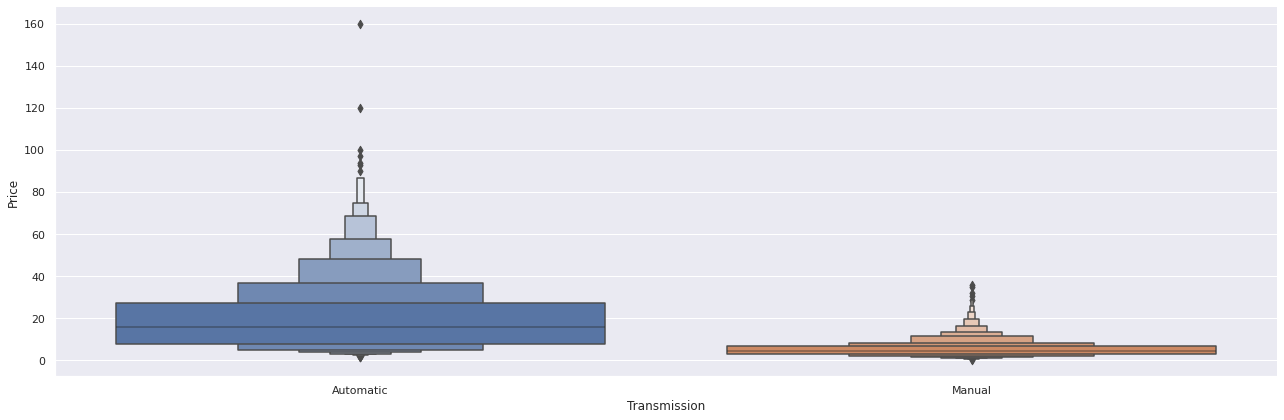

In [109]:
# Plotting Transmission vs Price
sns.catplot(y='Price',x='Transmission',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

In [110]:
Transmission = train_data[['Transmission']]
Transmission = pd.get_dummies(Transmission,drop_first=True)
Transmission.head()

,Transmission_Manual
0,1
1,1
2,1
3,1
4,0


(0.0, 100.0)

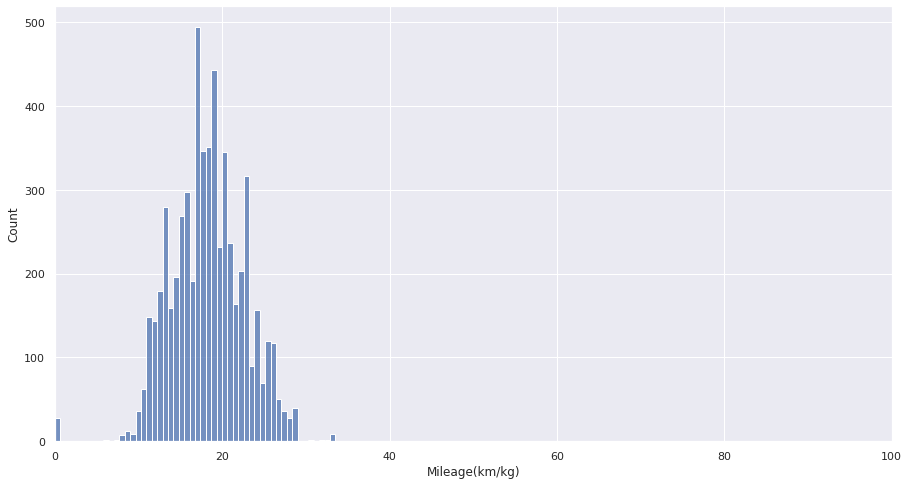

In [111]:
#plotting the mileage feature to look at its distribution
f, ax = plt.subplots(figsize=(15,8))
sns.histplot(train_data['Mileage(km/kg)'])
plt.xlim([0,100])

Text(0, 0.5, 'Price')

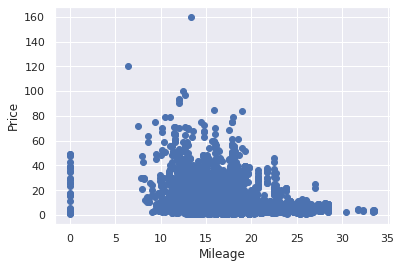

In [112]:
plt.scatter(train_data['Mileage(km/kg)'], train_data['Price'])
plt.xlabel("Mileage")
plt.ylabel("Price")

For the 'Owner_Type' variable we used replace() function to replace the string values with appropriate integer values

In [113]:
train_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)
train_data.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Company,Mileage(km/kg),Engine(CC),Power(bhp),New_car_Price
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,Maruti,26.60,998.0,58.16,NaN
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,Hyundai,19.67,1582.0,126.20,NaN
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,Honda,18.20,1199.0,88.70,8.61
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,Maruti,20.77,1248.0,88.76,NaN
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,Audi,15.20,1968.0,140.80,NaN


<function matplotlib.pyplot.show(*args, **kw)>

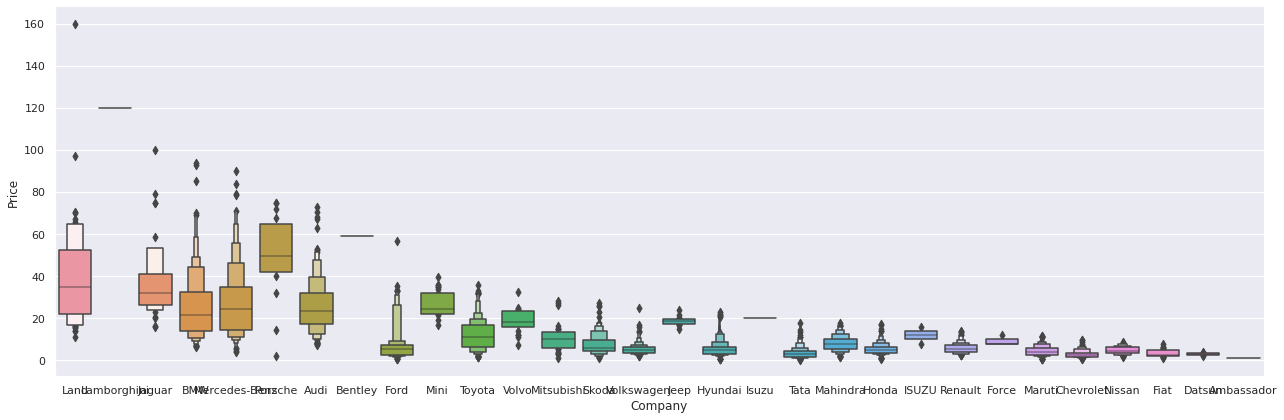

In [114]:
# Plot to see the price distribution of companies w.r.t price
sns.catplot(y='Price',x='Company',data= train_data.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Since there is a whole lot of variation, we decided to drop them.

In [115]:
train_data.drop(["Company"],axis=1,inplace=True)

In [116]:
final_train= pd.concat([train_data,Location,Fuel_t,Transmission],axis=1)
final_train.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,Mumbai,2010,72000,CNG,Manual,1,5.0,1.75,26.60,998.0,...,0,0,0,0,1,0,0,0,0,1
1,Pune,2015,41000,Diesel,Manual,1,5.0,12.50,19.67,1582.0,...,0,0,0,0,0,1,1,0,0,1
2,Chennai,2011,46000,Petrol,Manual,1,5.0,4.50,18.20,1199.0,...,0,0,0,0,0,0,0,0,1,1
3,Chennai,2012,87000,Diesel,Manual,1,7.0,6.00,20.77,1248.0,...,0,0,0,0,0,0,1,0,0,1
4,Coimbatore,2013,40670,Diesel,Automatic,2,5.0,17.74,15.20,1968.0,...,0,0,0,0,0,0,1,0,0,0


In [117]:
#dropping the categorical value columns as we added replacements
final_train.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)
final_train.head()

,Year,Kilometers_Driven,Owner_Type,Seats,Price,Mileage(km/kg),Engine(CC),Power(bhp),Location_Bangalore,Location_Chennai,...,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual
0,2010,72000,1,5.0,1.75,26.60,998.0,58.16,0,0,...,0,0,0,0,1,0,0,0,0,1
1,2015,41000,1,5.0,12.50,19.67,1582.0,126.20,0,0,...,0,0,0,0,0,1,1,0,0,1
2,2011,46000,1,5.0,4.50,18.20,1199.0,88.70,0,1,...,0,0,0,0,0,0,0,0,1,1
3,2012,87000,1,7.0,6.00,20.77,1248.0,88.76,0,1,...,0,0,0,0,0,0,1,0,0,1
4,2013,40670,2,5.0,17.74,15.20,1968.0,140.80,0,0,...,0,0,0,0,0,0,1,0,0,0


In [118]:
print("Shape of train dataset after entire processing: ",final_train.shape)

Shape of train dataset after entire processing:  (5872, 22)


We are Done with Training data, so now work on Test Data

# Prepare Test Data

Here we are repeating all the above steps for the preperation of test data.

In [119]:
test_data = test_data.iloc[:,1:]

print("Original shape of test data: ",train_data.shape)
test_data = test_data[test_data['Mileage'].notna()]
test_data = test_data[test_data['Engine'].notna()]
test_data = test_data[test_data['Power'].notna()]
test_data = test_data[test_data['Seats'].notna()]
print("Shape of test data after dropping rows with NULL values: ",test_data.shape)
print('Resetting the indexes after dropping the rows')
test_data = test_data.reset_index(drop=True)

for value_var in range(test_data.shape[0]):
    test_data.at[value_var, 'Mileage(km/kg)'] = test_data['Mileage'][value_var].split()[0]
    test_data.at[value_var, 'Engine(CC)'] = test_data['Engine'][value_var].split()[0]
    test_data.at[value_var, 'Power(bhp)'] = test_data['Power'][value_var].split()[0]
 
#converting feature into float
test_data['Mileage(km/kg)'] = test_data['Mileage(km/kg)'].astype(float)        
test_data['Engine(CC)'] = test_data['Engine(CC)'].astype(float)               

#appending indexes of rows with NULL values into a list to later drop those rows
position = []
for var in range(test_data.shape[0]):
    if test_data['Power(bhp)'][var]=='null':
        position.append(var)
        
#dropping rows and resetting the indexes        
test_data = test_data.drop(test_data.index[position])
test_data = test_data.reset_index(drop=True) 

#converting Power(bhp) into float
test_data['Power(bhp)'] = test_data['Power(bhp)'].astype(float)                   

for var in range(test_data.shape[0]):
    if pd.isnull(test_data.loc[var,'New_Price']) == False:
        test_data.at[var,'New_car_Price'] = test_data['New_Price'][var].split()[0]

test_data['New_car_Price'] = test_data['New_car_Price'].astype(float)

#dropping least useful features
test_data.drop(["Name"],axis=1,inplace=True)
test_data.drop(["Mileage"],axis=1,inplace=True)
test_data.drop(["Engine"],axis=1,inplace=True)
test_data.drop(["Power"],axis=1,inplace=True)
test_data.drop(["New_Price"],axis=1,inplace=True)

#handling the categorical varaibles
var = 'Location'
Location = test_data[[var]]                               
Location = pd.get_dummies(Location,drop_first=True)       

var = 'Fuel_Type'
Fuel_t = test_data[[var]]
Fuel_t = pd.get_dummies(Fuel_t,drop_first=True)

var = 'Transmission'
Transmission = test_data[[var]]
Transmission = pd.get_dummies(Transmission,drop_first=True)

test_data.replace({"First":1,"Second":2,"Third": 3,"Fourth & Above":4},inplace=True)

final_test= pd.concat([test_data,Location,Fuel_t,Transmission],axis=1)

final_test.drop(["Location","Fuel_Type","Transmission","New_car_Price"],axis=1,inplace=True)

print("Final shape of test dataset: ",final_test.shape)


Original shape of test data:  (5872, 12)
Shape of test data after dropping rows with NULL values:  (1223, 12)
Resetting the indexes after dropping the rows
Final shape of test dataset:  (1201, 21)


# Final Features Selection

In this step, we look for the final features we'll work on.

In [120]:
final_train.columns

Index(['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats', 'Price',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 'Location_Bangalore',
       'Location_Chennai', 'Location_Coimbatore', 'Location_Delhi',
       'Location_Hyderabad', 'Location_Jaipur', 'Location_Kochi',
       'Location_Kolkata', 'Location_Mumbai', 'Location_Pune',
       'Fuel_Type_Diesel', 'Fuel_Type_LPG', 'Fuel_Type_Petrol',
       'Transmission_Manual'],
      dtype='object')

In [121]:
X = final_train.loc[:,['Year', 'Kilometers_Driven', 'Owner_Type', 'Seats',
       'Mileage(km/kg)', 'Engine(CC)', 'Power(bhp)', 
       'Location_Bangalore', 'Location_Chennai', 'Location_Coimbatore',
       'Location_Delhi', 'Location_Hyderabad', 'Location_Jaipur',
       'Location_Kochi', 'Location_Kolkata', 'Location_Mumbai',
       'Location_Pune', 'Fuel_Type_Diesel', 'Fuel_Type_LPG',
       'Fuel_Type_Petrol', 'Transmission_Manual']]
X.shape

(5872, 21)

In [122]:
y = final_train.loc[:,['Price']]

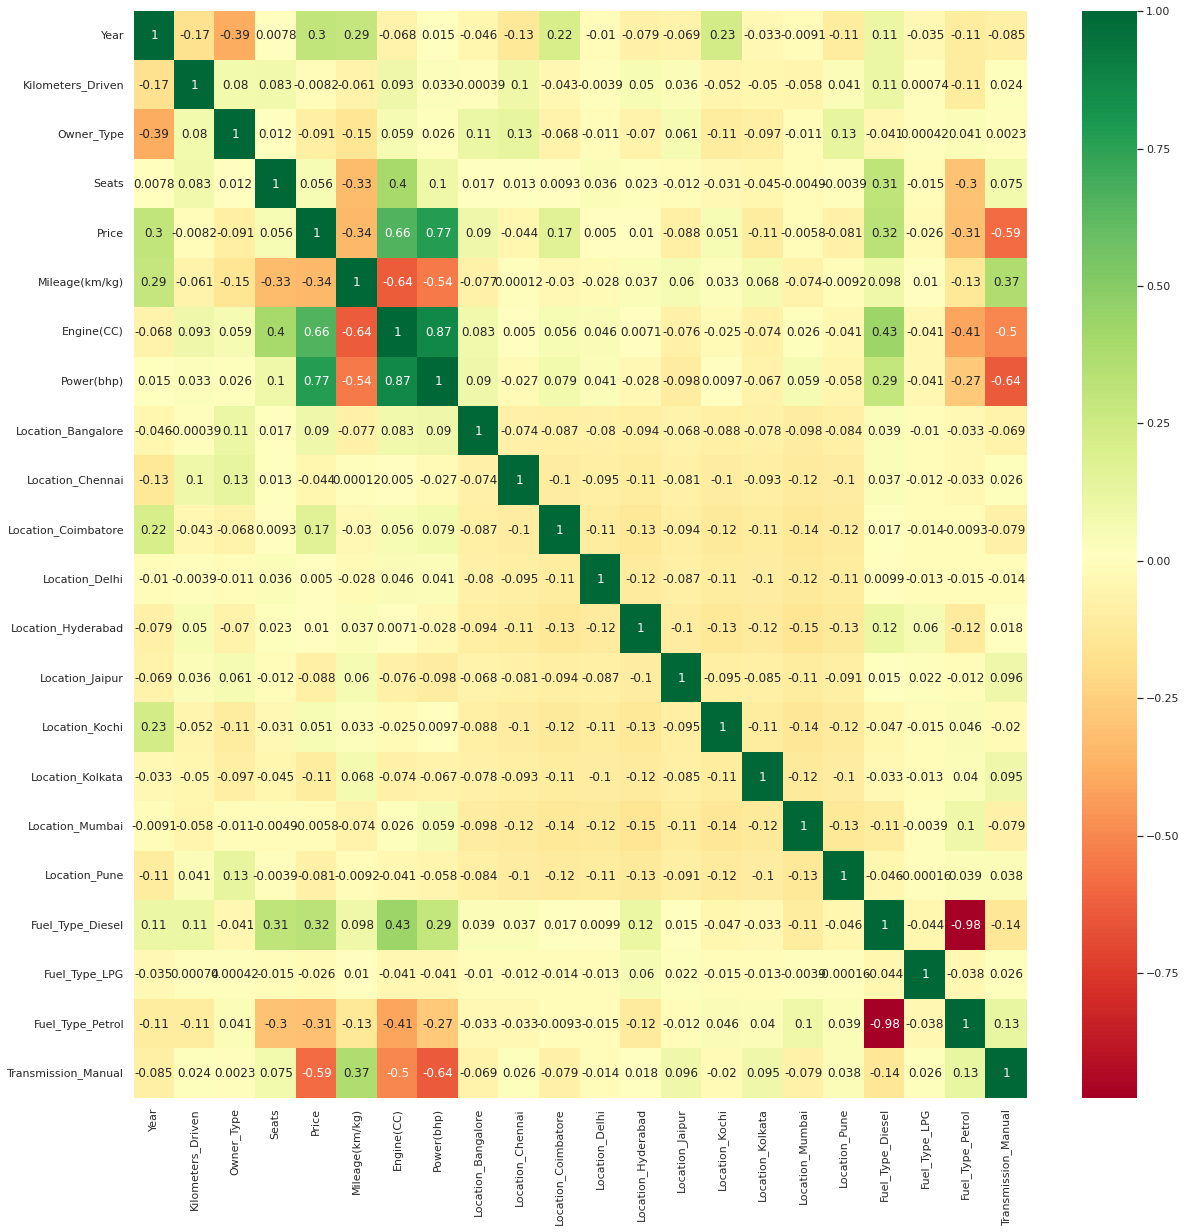

In [123]:
plt.figure(figsize=(20,20))
sns.heatmap(final_train.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [124]:
from sklearn.ensemble import ExtraTreesRegressor
selection= ExtraTreesRegressor()
selection.fit(X,y)

<ipython-input-124-914d803b91a8>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  selection.fit(X,y)


ExtraTreesRegressor()

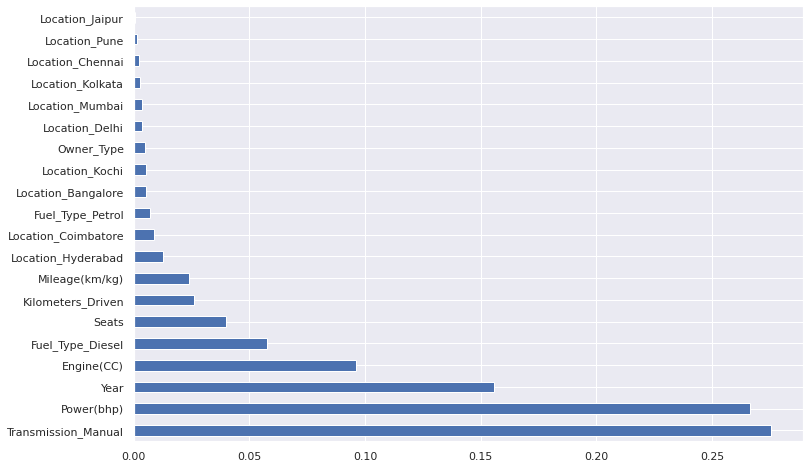

In [125]:
#plotting a graph to look  for the importance of the final features
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Build it (Model)

First we are spliting the data to train and test for the model

In [126]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 25)

### Linear Regression.

In [127]:
from sklearn.linear_model import LinearRegression
#making a linear regression model using sklearn
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train, y_train)                            
y_pred_l= linear_reg_model.predict(X_test)
print("R2 score on Training set: ",linear_reg_model.score(X_train,y_train))
print("R2 score on Testing set: ",linear_reg_model.score(X_test,y_test))

R2 score on Training set:  0.7083070284244629
R2 score on Testing set:  0.6991016530826974


In [128]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Error Metrics for Linear Regression model ")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred_l))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred_l))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred_l)))

Error Metrics for Linear Regression model 
Mean Absolute Error      :  3.6843068533998657
Mean Squared  Error      :  35.26240354856352
Root Mean Squared  Error :  5.938215518871265


#### As R2 score is low, we also made a random forest regression model.


### Random Forest Regressor

In [129]:
from sklearn.ensemble import RandomForestRegressor             
#making a random forest regression model using sklearn
rf_reg_model = RandomForestRegressor()
rf_reg_model.fit(X_train, y_train)
y_pred= rf_reg_model.predict(X_test)
print("R2 score on Training set: ",rf_reg_model.score(X_train,y_train))
print("R2 score on Testing set: ",rf_reg_model.score(X_test,y_test))

<ipython-input-129-db900c957c53>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg_model.fit(X_train, y_train)


R2 score on Training set:  0.9838824908428276
R2 score on Testing set:  0.9092870172110906


We finall got an acceptable accuracy rate.
Now we go ahead and calculate error metrics for this model.

In [130]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error
print("Error Table for Random Forest Regressor")
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Error Table for Random Forest Regressor
Mean Absolute Error      :  1.5283559969604865
Mean Squared  Error      :  10.63069252113754
Root Mean Squared  Error :  3.260474278557882


####As we can see there is a significant improvement in the random forest regression model as compared to linear regression model.